# Reporte: Entrenar un modelo de regresión linea múltiple

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Cargamos los datos

In [11]:
ruta = '/home/personal/Documentos/semestre-2/Intro_AprendizajeM/dataset/gld_price_data.csv'
datos = pd.read_csv(ruta)

In [10]:
(
    datos.head(10)
)    

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


SPX:índice bursátil de EE.UU. 
GLD:Precio del Oro
USO:Precio del Petróleo
SLV:Precio de la plata
EUR/USD:Tasa de cambio del euro respecto al dólar estadounidense.

#  Separar los datos en entrenamiento y prueba

In [15]:
# Convertir la columna de fecha a datetime (si es necesario)
datos.iloc[:, 0] = pd.to_datetime(datos.iloc[:, 0])

# Seleccionar variable objetivo y predictores
X = datos[['SPX', 'USO', 'SLV', 'EUR/USD']]  # Variables predictoras
y = datos['GLD']  # Variable objetivo

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresiones Lineales Simples (una variable a la vez)

Vamos a entrenar tres regresiones lineales simples usando tres de las variables predictoras.
Regresión 1: GLD vs SPX

Modelo GLD vs SPX: R² = 0.00, RMSE = 23.37


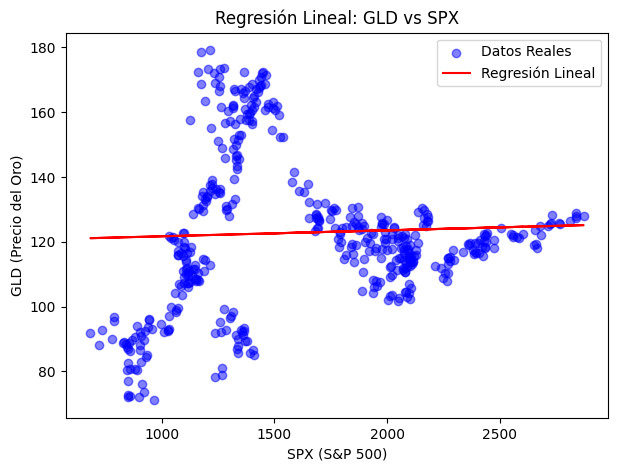

In [17]:
# Modelo de regresión lineal simple con SPX
X_train_spx = X_train[['SPX']]
X_test_spx = X_test[['SPX']]

modelo_spx = LinearRegression()
modelo_spx.fit(X_train_spx, y_train)

# Predicciones
y_pred_spx = modelo_spx.predict(X_test_spx)

# Evaluación del modelo
r2_spx = r2_score(y_test, y_pred_spx)
rmse_spx = np.sqrt(mean_squared_error(y_test, y_pred_spx))

print(f"Modelo GLD vs SPX: R² = {r2_spx:.2f}, RMSE = {rmse_spx:.2f}")

# Graficar la recta de regresión
plt.figure(figsize=(7,5))
plt.scatter(X_test_spx, y_test, label="Datos Reales", color='blue', alpha=0.5)
plt.plot(X_test_spx, y_pred_spx, color='red', label="Regresión Lineal")
plt.xlabel("SPX (S&P 500)")
plt.ylabel("GLD (Precio del Oro)")
plt.legend()
plt.title("Regresión Lineal: GLD vs SPX")
plt.show()


 Repetimos lo mismo para USO y SLV

Modelo GLD vs USO: R² = 0.02, RMSE = 23.15


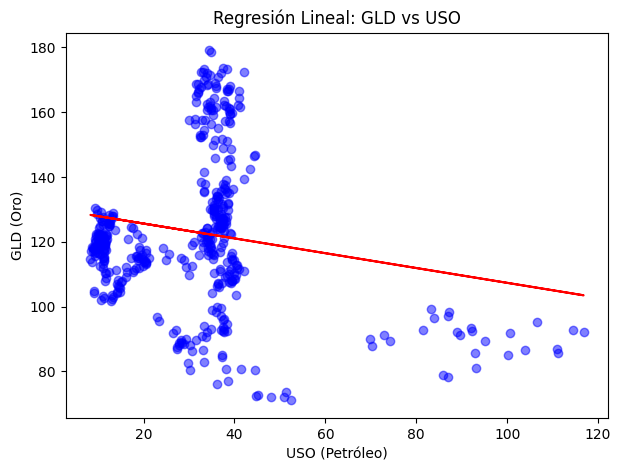

In [18]:
 # Modelo GLD vs USO
X_train_uso = X_train[['USO']]
X_test_uso = X_test[['USO']]
modelo_uso = LinearRegression()
modelo_uso.fit(X_train_uso, y_train)
y_pred_uso = modelo_uso.predict(X_test_uso)
r2_uso = r2_score(y_test, y_pred_uso)
rmse_uso = np.sqrt(mean_squared_error(y_test, y_pred_uso))

print(f"Modelo GLD vs USO: R² = {r2_uso:.2f}, RMSE = {rmse_uso:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(X_test_uso, y_test, color='blue', alpha=0.5)
plt.plot(X_test_uso, y_pred_uso, color='red')
plt.xlabel("USO (Petróleo)")
plt.ylabel("GLD (Oro)")
plt.title("Regresión Lineal: GLD vs USO")
plt.show()

# Tercera regresión lineal simple

Modelo GLD vs SLV: R² = 0.77, RMSE = 11.12


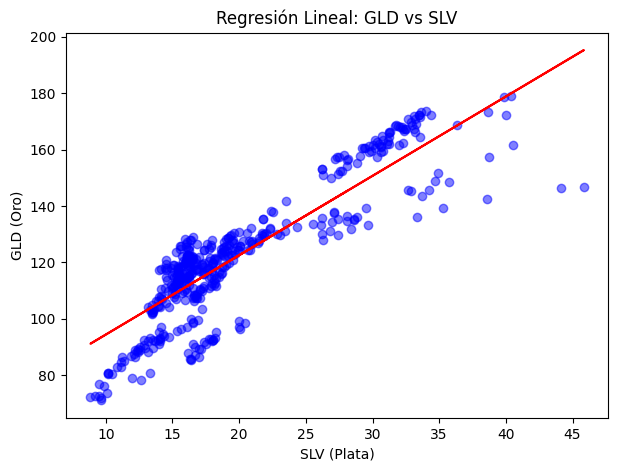

In [19]:
# Modelo GLD vs SLV
X_train_slv = X_train[['SLV']]
X_test_slv = X_test[['SLV']]
modelo_slv = LinearRegression()
modelo_slv.fit(X_train_slv, y_train)
y_pred_slv = modelo_slv.predict(X_test_slv)
r2_slv = r2_score(y_test, y_pred_slv)
rmse_slv = np.sqrt(mean_squared_error(y_test, y_pred_slv))

print(f"Modelo GLD vs SLV: R² = {r2_slv:.2f}, RMSE = {rmse_slv:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(X_test_slv, y_test, color='blue', alpha=0.5)
plt.plot(X_test_slv, y_pred_slv, color='red')
plt.xlabel("SLV (Plata)")
plt.ylabel("GLD (Oro)")
plt.title("Regresión Lineal: GLD vs SLV")
plt.show()